<a href="https://colab.research.google.com/github/bil-la/BIRCH-Clustering/blob/main/Another_copy_of_computer_vision_and_open_cv_As.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python opencv-contrib-python numpy matplotlib ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00


In [ ]:
!mkdir -p /content/ClassWork/scripts /content/ClassWork/images /content/ClassWork/calibration_images /content/ClassWork/outputs

In [ ]:
!ls /content/ClassWork

calibration_images  images  outputs  scripts


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload image1.jpg and image2.jpg
!mv /content/images1.jpg /content/ClassWork/images/image1.jpg
!mv /content/images2.jpg /content/ClassWork/images/image2.jpg

Saving images2.jpg to images2 (1).jpg


In [ ]:
!ls /content/ClassWork/images

image1.jpg  image2.jpg


Similarity (Correlation): 0.10099033298924921


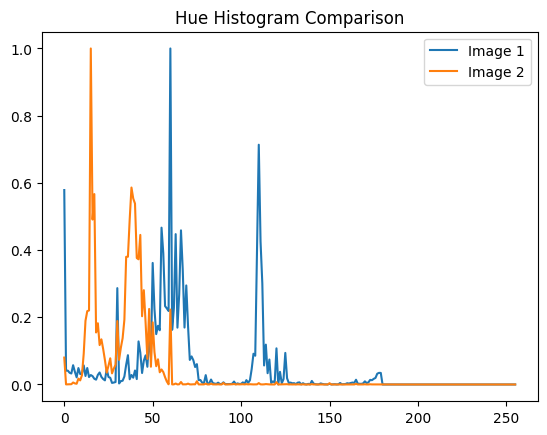

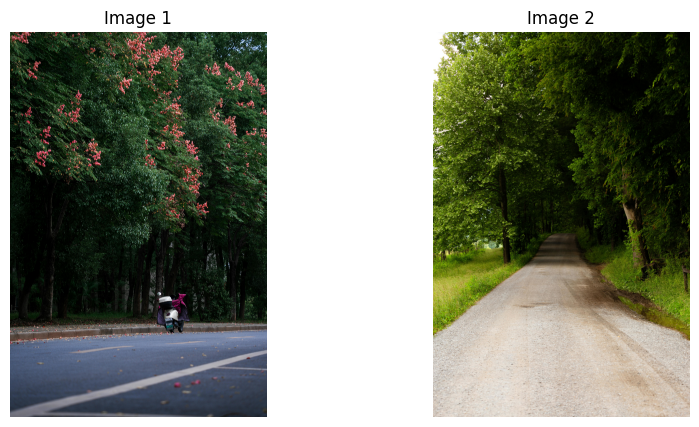

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread('/content/ClassWork/images/image1.jpg')
if image is None:
    raise FileNotFoundError("Image not found")

# Convert to HSV color space for better histogram results
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Compute histogram (e.g., for Hue channel)
hist = cv2.calcHist([hsv_image], [0], None, [256], [0, 256])

# Normalize histogram
hist = cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)

# For matching, load another image and compute its histogram
image2 = cv2.imread('/content/ClassWork/images/image2.jpg')
if image2 is None:
    raise FileNotFoundError("Second image not found")
hsv_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2HSV)
hist2 = cv2.calcHist([hsv_image2], [0], None, [256], [0, 256])
hist2 = cv2.normalize(hist2, hist2, 0, 1, cv2.NORM_MINMAX)

# Compare histograms using correlation
similarity = cv2.compareHist(hist, hist2, cv2.HISTCMP_CORREL)
print(f"Similarity (Correlation): {similarity}")

# Plot histograms
plt.plot(hist, label='Image 1')
plt.plot(hist2, label='Image 2')
plt.title('Hue Histogram Comparison')
plt.legend()
plt.savefig('/content/ClassWork/outputs/histogram_plot.png')  # Save plot
plt.show()

# Display images for reference (optional)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image 1')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.title('Image 2')
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
files.download('/content/ClassWork/outputs/histogram_plot.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload calibration_images.zip
!unzip /content/calibration_images.zip -d /content/ClassWork/calibration_images

Saving calibration_images.zip.zip to calibration_images.zip.zip
Archive:  /content/calibration_images.zip.zip
  inflating: /content/ClassWork/calibration_images/left03.jpg  
  inflating: /content/ClassWork/calibration_images/left02.jpg  
  inflating: /content/ClassWork/calibration_images/left01.jpg  
  inflating: /content/ClassWork/calibration_images/left14.jpg  
  inflating: /content/ClassWork/calibration_images/left13.jpg  
  inflating: /content/ClassWork/calibration_images/left12.jpg  
  inflating: /content/ClassWork/calibration_images/left11.jpg  
  inflating: /content/ClassWork/calibration_images/left09.jpg  
  inflating: /content/ClassWork/calibration_images/left08.jpg  
  inflating: /content/ClassWork/calibration_images/left07.jpg  
  inflating: /content/ClassWork/calibration_images/left06.jpg  
  inflating: /content/ClassWork/calibration_images/left05.jpg  
  inflating: /content/ClassWork/calibration_images/left04.jpg  


In [ ]:
!ls /content/ClassWork/calibration_images

left01.jpg  left04.jpg	left07.jpg  left11.jpg	left14.jpg
left02.jpg  left05.jpg	left08.jpg  left12.jpg
left03.jpg  left06.jpg	left09.jpg  left13.jpg


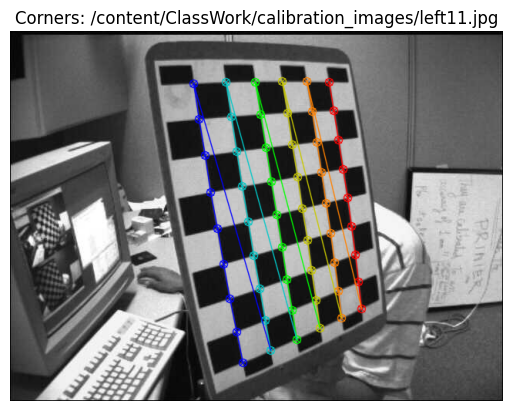

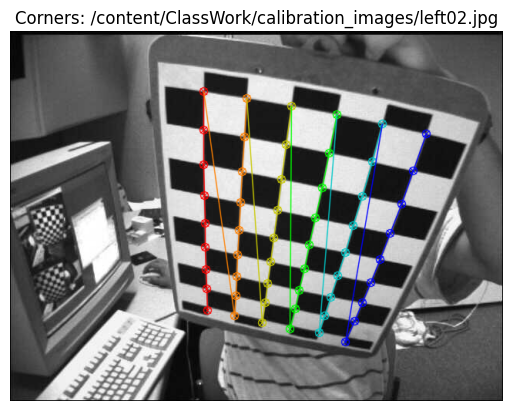

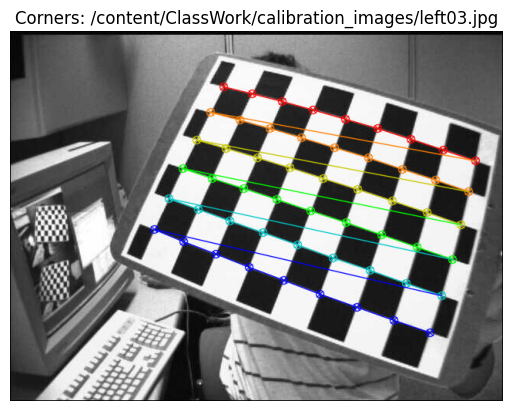

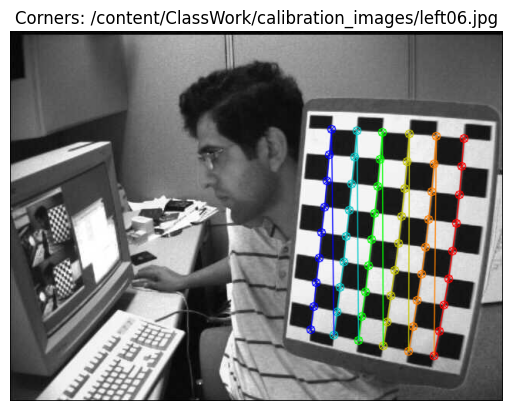

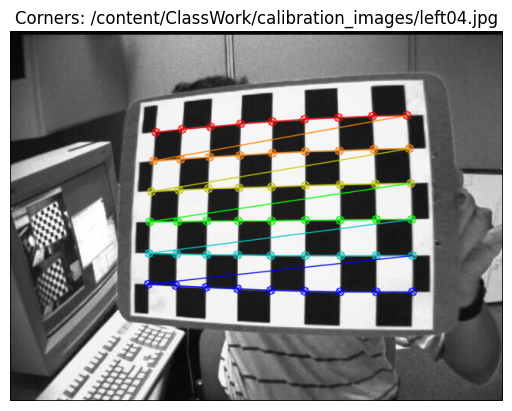

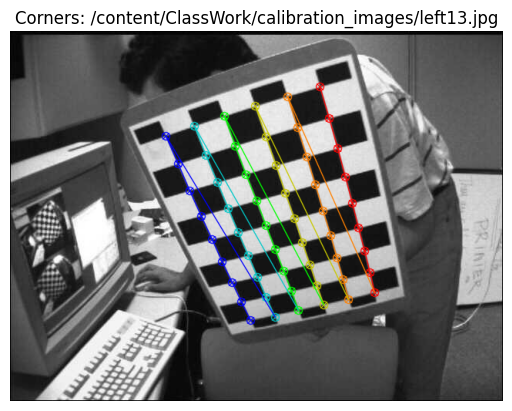

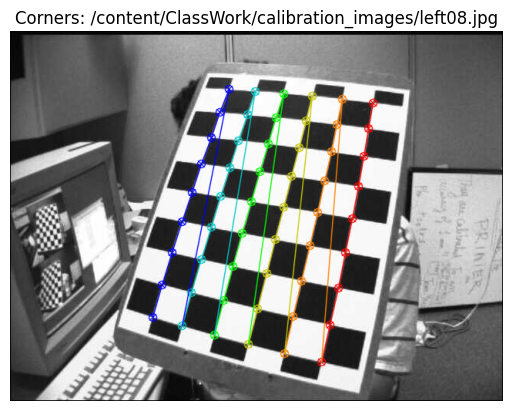

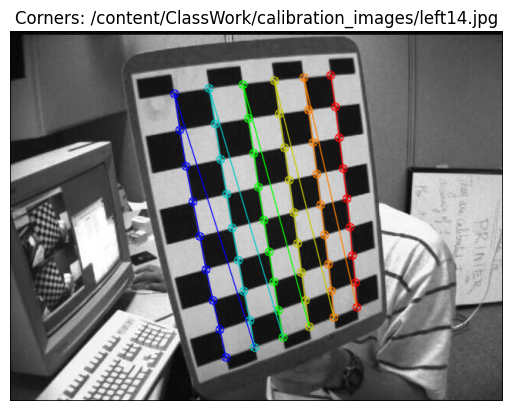

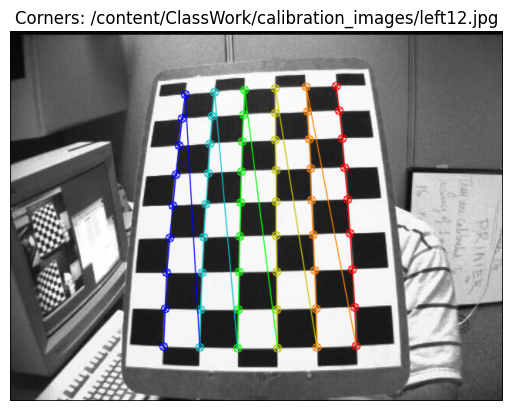

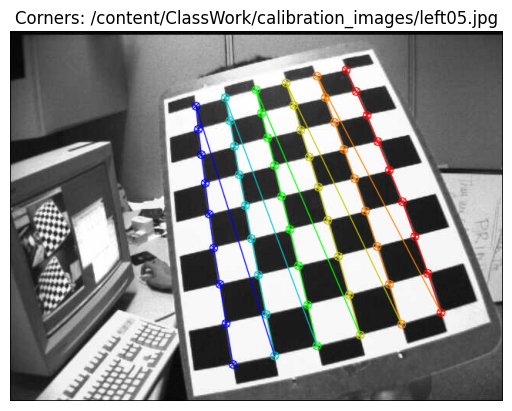

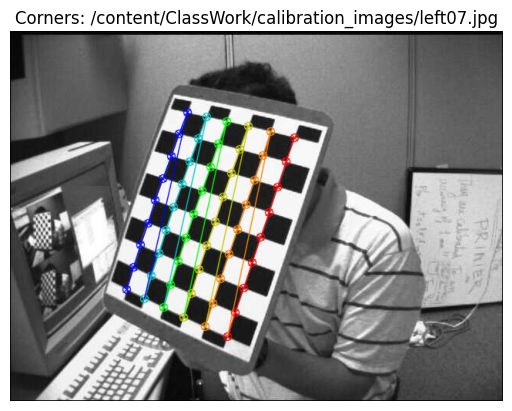

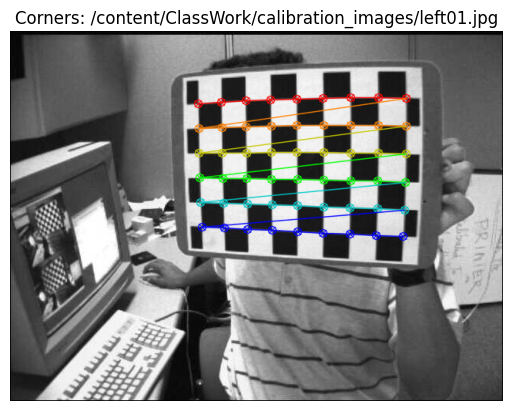

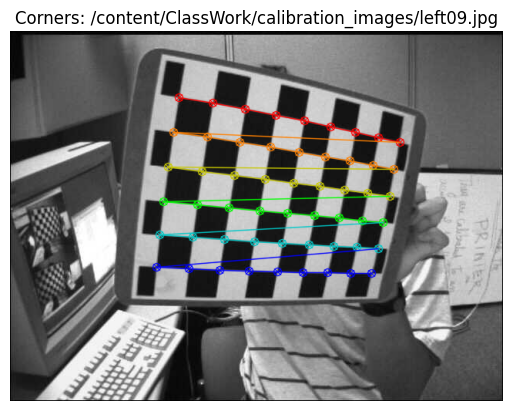

Camera Matrix:
 [[536.07343318   0.         342.37047327]
 [  0.         536.01634142 235.53687503]
 [  0.           0.           1.        ]]
Distortion Coefficients:
 [[-0.26509009 -0.04674442  0.00183303 -0.00031469  0.2523162 ]]
Calibration parameters saved to '/content/ClassWork/outputs/calibration_params.npz'


In [ ]:
import cv2
import numpy as np
import glob
from matplotlib import pyplot as plt

# Set up chessboard parameters
chessboard_size = (9, 6)  # Number of inner corners (width, height)
square_size = 0.025  # Size of a square in meters (adjust as needed)

# Prepare object points
objp = np.zeros((chessboard_size[0] * chessboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:chessboard_size[0], 0:chessboard_size[1]].T.reshape(-1, 2) * square_size

# Arrays to store object points and image points
objpoints = []  # 3D points in real world
imgpoints = []  # 2D points in image plane

# Load calibration images
images = glob.glob('/content/ClassWork/calibration_images/*.jpg')
if not images:
    raise FileNotFoundError("No calibration images found")

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, chessboard_size, None)

    if ret:
        objpoints.append(objp)
        # Refine corners
        corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1),
                                   criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001))
        imgpoints.append(corners2)

        # Draw corners (optional display)
        img_with_corners = img.copy()
        cv2.drawChessboardCorners(img_with_corners, chessboard_size, corners2, ret)
        plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
        plt.title(f'Corners: {fname}')
        plt.axis('off')
        plt.show()

# Calibrate camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Print results
print("Camera Matrix:\n", mtx)
print("Distortion Coefficients:\n", dist)

# Save parameters
np.savez('/content/ClassWork/outputs/calibration_params.npz', mtx=mtx, dist=dist)
print("Calibration parameters saved to '/content/ClassWork/outputs/calibration_params.npz'")

In [ ]:
from google.colab import files
files.download('/content/ClassWork/outputs/calibration_params.npz')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload image1.jpg
!mv /content/images1.jpg /content/ClassWork/images/images1.jpg

Saving images1.jpg to images1 (2).jpg


In [ ]:
!ls /content/ClassWork/images

image1.jpg  image2.jpg	images1.jpg


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider

# Load image
img = cv2.imread('/content/ClassWork/images/image1.jpg', cv2.IMREAD_GRAYSCALE)
if img is None:
    raise FileNotFoundError("Image not found")

def canny_edge(threshold1, threshold2):
    # Apply Gaussian blur to reduce noise
    blurred = cv2.GaussianBlur(img, (5, 5), 0)
    # Apply Canny edge detection
    edges = cv2.Canny(blurred, threshold1, threshold2)
    # Display result
    plt.imshow(edges, cmap='gray')
    plt.title(f'Canny Edge Detection (T1={threshold1}, T2={threshold2})')
    plt.axis('off')
    plt.show()
    # Save result
    cv2.imwrite('/content/ClassWork/outputs/edges.jpg', edges)

# Interactive sliders
interact(canny_edge,
         threshold1=IntSlider(min=0, max=500, step=10, value=100, description='Threshold1'),
         threshold2=IntSlider(min=0, max=500, step=10, value=200, description='Threshold2'))

interactive(children=(IntSlider(value=100, description='Threshold1', max=500, step=10), IntSlider(value=200, d…

<function __main__.canny_edge(threshold1, threshold2)>

In [ ]:
from google.colab import files
files.download('/content/ClassWork/outputs/edges.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving apple.jpg to apple.jpg


In [ ]:
import os
print(os.listdir())


['.config', 'oranges (3).png', 'apple (1).jpeg', 'drive', 'orange', 'ClassWork', 'images2 (1).jpg', 'images1 (1).jpg', 'oranges (1).png', 'images1 (2).jpg', 'apple (3).jpeg', 'apple (2).jpeg', 'apple.jpg', 'orange (1)', 'calibration_images.zip.zip', 'apple.jpeg', 'sample_data']


In [ ]:
!ls /content/ClassWork/images

apple.jpg  image1.jpg  image2.jpg  images1.jpg	orange.jpg  oranges.jpg


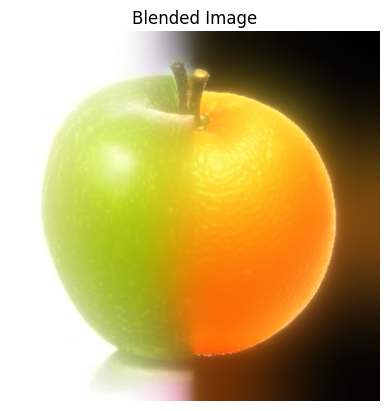

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load images
apple = cv2.imread('/content/ClassWork/images/apple.jpg')
orange = cv2.imread('/content/ClassWork/images/orange.jpg')
if apple is None or orange is None:
    raise FileNotFoundError("Images not found")

# Ensure images are the same size
apple = cv2.resize(apple, (512, 512))
orange = cv2.resize(orange, (512, 512))

# Generate Gaussian Pyramids (6 levels)
def generate_gaussian_pyramid(img, levels=6):
    pyramid = [img]
    for i in range(levels):
        img = cv2.pyrDown(img)
        pyramid.append(img)
    return pyramid

apple_gpyr = generate_gaussian_pyramid(apple)
orange_gpyr = generate_gaussian_pyramid(orange)

# Generate Laplacian Pyramids
def generate_laplacian_pyramid(gpyr):
    lpyr = []
    for i in range(len(gpyr)-1):
        size = (gpyr[i].shape[1], gpyr[i].shape[0])
        upsampled = cv2.pyrUp(gpyr[i+1], dstsize=size)
        laplacian = cv2.subtract(gpyr[i], upsampled)
        lpyr.append(laplacian)
    lpyr.append(gpyr[-1])  # Top level is same as Gaussian
    return lpyr

apple_lpyr = generate_laplacian_pyramid(apple_gpyr)
orange_lpyr = generate_laplacian_pyramid(orange_gpyr)

# Join left half of apple and right half of orange
blended_lpyr = []
for la, lo in zip(apple_lpyr, orange_lpyr):
    cols = la.shape[1]
    blended = np.hstack((la[:, :cols//2], lo[:, cols//2:]))
    blended_lpyr.append(blended)

# Reconstruct the image
reconstructed = blended_lpyr[-1]
for i in range(len(blended_lpyr)-2, -1, -1):
    size = (blended_lpyr[i].shape[1], blended_lpyr[i].shape[0])
    reconstructed = cv2.pyrUp(reconstructed, dstsize=size)
    reconstructed = cv2.add(blended_lpyr[i], reconstructed)

# Save and display result
cv2.imwrite('/content/ClassWork/outputs/blended_image.jpg', reconstructed)
plt.imshow(cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB))
plt.title('Blended Image')
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
files.download('/content/ClassWork/outputs/blended_image.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>